## Modules à importer

In [373]:
import math
import scipy
import pickle
import numpy as np
import pandas as pd
import iminuit as im
import ipywidgets as ipw
from variaIa import tools
#from variaIa import tools_ar_sc
from typing import List, Tuple
from importlib import reload
from variaIa import stretchevol
from variaIa.tools import surveys, df_cons, df_nc, df_c, df_full, z_max
#from variaIa.tools_ar_sc import surveys, df_cons, df_nc, df_c, df_full, z_max
from IPython.display import display, Latex
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits import mplot3d
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "EB Garamond",
    "axes.labelsize": 'x-large',
    "xtick.labelsize": 'x-large',
    "ytick.labelsize": 'x-large'})
import random

## Définitions pandas, surveys et sélection de l'échantillon à utiliser

### Définition des données à montrer

In [467]:
def set_survey(cons, su):
    global df
    if su == 'All':
        df = df_cons(cons)
    elif 'n' in su:
        df = df_cons(cons)[df_cons(cons)['survey'] != su.split('n')[-1]]
    else:
        df = df_cons(cons)[df_cons(cons)['survey'] == su]
    return df

int_set_su = ipw.interactive(set_survey, cons=tools.cons, su=tools.su)
#int_set_su = ipw.interactive(set_survey, cons=tools_sc.cons, su=tools_sc.su)
display(int_set_su)

smap = plt.cm.get_cmap('cividis')
colors = {'SNF': plt.cm.binary(0.9),
          'ZTF': plt.cm.viridis(0.1),
          'SDSS': smap(0.1),
          'PS1': smap(0.5),
          'SNLS': smap(0.8),
          'HST': smap(0.99),  # for cividis
          #'HST': smap(300)}  # for viridis
          'All': (255/255, 51/255, 0/255),
          'Base': (100/255, 149/255, 237/255),#'cornflowerblue',
          'Base+ZTF': (239/255, 192/255, 225/255)}#'orchid'}

color_ar = 'cornflowerblue'
color_zt = colors['ZTF']

def alphacolors(alpha, survey):
    return(colors[survey][0], colors[survey][1], colors[survey][2], alpha)

upper = mpl.cm.Blues(np.arange(256))
lower = mpl.cm.Blues_r(np.arange(256))
cmap = np.vstack((lower, upper))
cmap_btb = mpl.colors.ListedColormap(cmap, name='btb', N=cmap.shape[0])
upper = mpl.cm.Purples(np.arange(256))
lower = mpl.cm.Purples_r(np.arange(256))
cmap = np.vstack((lower, upper))
cmap_ptp = mpl.colors.ListedColormap(cmap, name='ptp', N=cmap.shape[0])

df_nHST = df_nc.loc[df_nc['survey'] != 'HST']
df_ar = df_nc.loc[~df_nc['survey'].isin(['ZTF', 'LOWZ'])]
df_ar_c = df_c.loc[~df_c['survey'].isin(['ZTF', 'LOWZ'])]
df_nLOWZ = df_nc.loc[df_nc['survey'] != 'LOWZ']
df_nLOWZ_c = df_c.loc[df_c['survey'] != 'LOWZ']
surveysar = surveys[0:1]+surveys[3:]
surveysnl = surveys[0:2]+surveys[3:]

interactive(children=(Checkbox(value=False, description='Conservative'), Dropdown(description='Survey:', optio…

## Check which model is best with ZTF

### Minimisation des modèles AVEC ZTF à mettre dans le _pandas_

In [392]:
########################################### Evol Simple

evol1G1M1S = stretchevol.Evol1G1M1S(df_nLOWZ)

print('1G1M1S')

evol1G1M1S.minimize()
#evol1G1M1S.show_model_tot()

########################################### Evol Kessler

evol1G1M2S = stretchevol.Evol1G1M2S(df_nLOWZ)

print('1G1M2S')

evol1G1M2S.minimize()
#evol1G1M2S.show_model_tot()

########################################### Evol Howell

evol2G2M2S = stretchevol.Evol2G2M2S(df_nLOWZ)

print('2G2M2S')

evol2G2M2S.minimize()
#evol2G2M2S.scatter()

########################################### Evol Howell Fixed

evol2G2M2SF = stretchevol.Evol2G2M2SF(df_nLOWZ)

print('2G2M2SF')

evol2G2M2SF.minimize()
#evol2G2M2SF.scatter()

########################################### Evol Howell Z

evol2G2M2Sz = stretchevol.Evol2G2M2S(df_nLOWZ, py=False)

print('2G2M2Sz')

evol2G2M2Sz.minimize()
#evol2G2M2S.scatter()

########################################### Evol Howell Fixed Z

evol2G2M2SFz = stretchevol.Evol2G2M2SF(df_nLOWZ, py=False)

print('2G2M2SFz')

evol2G2M2SFz.minimize()
#evol2G2M2SF.scatter()

########################################### Evol NR 1S

evol3G2M1S = stretchevol.Evol3G2M1S(df_nLOWZ)

print('3G2M1S')

evol3G2M1S.minimize()

########################################### Evol NR 2S z

evol3G2M1SF = stretchevol.Evol3G2M1SF(df_nLOWZ)

print('3G2M1SF')

evol3G2M1SF.minimize()

########################################### Evol NR 2S

evol3G2M2S = stretchevol.Evol3G2M2S(df_nLOWZ)

print('3G2M2S')

evol3G2M2S.minimize()
#evol3G2M2S.scatter()

########################################### Evol NR 2S z

evol3G2M2Sz = stretchevol.Evol3G2M2S(df_nLOWZ, py=False)

print('3G2M2Sz')

evol3G2M2Sz.minimize()
#evol3G2M2S.scatter()

########################################### Evol NR 2S Fixed

evol3G2M2SF = stretchevol.Evol3G2M2SF(df_nLOWZ)

print('3G2M2SF')

evol3G2M2SF.minimize(limits=[(0,1), None, None, None, None, None])
#evol3G2M2SF.scatter()

########################################### Evol NR 2S Fixed Z

evol3G2M2SFz = stretchevol.Evol3G2M2SF(df_nLOWZ, py=False)

print('3G2M2SFz')

evol3G2M2SFz.minimize(limits=[(0,1), None, None, None, None, None])
#evol3G2M2SF.scatter()

########################################### Evol NR 3S

evol3G3M3S = stretchevol.Evol3G3M3S(df_nLOWZ)

print('3G3M3S')

evol3G3M3S.minimize()

########################################### Evol NR 3S F

evol3G3M3SF = stretchevol.Evol3G3M3SF(df_nLOWZ)

print('3G3M3SF')

evol3G3M3SF.minimize()

########################################### Evol NR 3S Z

evol3G3M3Sz = stretchevol.Evol3G3M3S(df_nLOWZ, py=False)

print('3G3M3Sz')

evol3G3M3Sz.minimize()

########################################### Evol NR 4G2S

evol4G2M2S = stretchevol.Evol4G2M2S(df_nLOWZ)

print('4G2M2S')

evol4G2M2S.minimize()

########################################### Evol NR 4G2S F

evol4G2M2SF = stretchevol.Evol4G2M2SF(df_nLOWZ)

print('4G2M2SF')

GUESSVAL = {'f': 0.14268671739589583,
            'bb': -5.454890323164392,
            'aa': 0.6869059692032704,
            'mu_1': 0.551869340886351,
            'sigma_1': 0.5242352095150387,
            'mu_2': -0.6947825573353303,
            'sigma_2': 0.7580500490633603}
LIMVAL = [(0.3,1), None, None, None, None, None, None]
evol4G2M2SF.minimize(limits=LIMVAL, guess=GUESSVAL)

########################################### Evol NR 4S

evol4G4M4S = stretchevol.Evol4G4M4S(df_nLOWZ)

print('4G4M4S')

evol4G4M4S.minimize()

########################################### Evol NR 4S F

evol4G4M4SF = stretchevol.Evol4G4M4SF(df_nLOWZ)

print('4G4M4SF')

GUESSVAL = {'f': 0.629551173003198,
            'aa': 0.9720896076581093,
            'bb': 1.0577042881210368,
            'mu_1': 0.7507884223245606,
            'sigma_1': 0.4056335262642809,
            'mu_4': -1.4487107165579862,
            'sigma_4': 0.44921397062196367,
            'mu_2': -0.10179706942678185,
            'sigma_2': 0.2597995223119345,
            'mu_3': -0.7764748289670739,
            'sigma_3': 0.15335786478417332}
LIMVAL = [(0,1), None, None, None, None, None, None, None, None, None, None]
evol4G4M4SF.minimize(limits=LIMVAL, guess=GUESSVAL)

########################################### Per Sample Asym
gen = stretchevol.generic()
gen.set_model('Evol1G1M2S')

assymSNF = gen.fit(set_survey(tools.cons.value, 'SNF'))

assymZTF = gen.fit(set_survey(tools.cons.value, 'ZTF'))

assymSDSS = gen.fit(set_survey(tools.cons.value, 'SDSS'))

assymPS1 = gen.fit(set_survey(tools.cons.value, 'PS1'))

assymSNLS = gen.fit(set_survey(tools.cons.value, 'SNLS'))

assymHST = gen.fit(set_survey(tools.cons.value, 'HST'))

assymTOT = gen.fit(set_survey(tools.cons.value, 'All'))

assym = {'SNF': assymSNF,
         'ZTF': assymZTF,
         'SDSS': assymSDSS,
         'PS1': assymPS1,
         'SNLS': assymSNLS,
         'HST': assymHST}

print('Per Sample')

1G1M1S
1G1M2S
2G2M2S
2G2M2SF
2G2M2Sz
2G2M2SFz
3G2M1S
3G2M1SF
3G2M2S
3G2M2Sz
3G2M2SF
3G2M2SFz
3G3M3S
3G3M3SF
3G3M3Sz
4G2M2S
4G2M2SF
4G4M4S
4G4M4SF
Per Sample


## Get proba

In [393]:
def get_proba(model):
    return np.exp((evol3G2M2S.get_aic() - model.get_aic())/2)

## Comparison dataframes

In [396]:
modèles = [evol4G4M4S, evol3G2M2S,
           evol3G3M3S, evol4G2M2S, evol2G2M2S, 
           evol2G2M2SF, evol3G3M3SF,
           evol3G2M2SF, evol4G2M2SF,
           evol4G4M4SF, evol1G1M2S, evol1G1M1S]

persample = [assym[k] for k in assym.keys()]

d_mod_comp = pd.DataFrame({'Name': [k.__doc__ for k in modèles[:-4]] +
                               ['Asym par échant.'] +
                               [k.__doc__ for k in modèles[-4:]],
                           'Fixed': [k.FIXED for k in modèles[:-4]] +
                               ['True'] +
                               [k.FIXED for k in modèles[-4:]],
                           'Free param': [len(k.FREEPARAMETERS) for k in modèles[:-4]] +
                               ['3x5'] +
                               [len(k.FREEPARAMETERS) for k in modèles[-4:]],
                           '$\mathcal{L}$': [round(k.get_logl(),1) for k in modèles[:-4]] +
                               [round(np.sum([k.get_logl() for k in persample]),1)] +
                               [round(k.get_logl(),1) for k in modèles[-4:]],
                           'AIC': [round(k.get_aic(),1) for k in modèles[:-4]] +
                               [round(np.sum([k.get_aic() for k in persample]),1)] +
                               [round(k.get_aic(),1) for k in modèles[-4:]],
                           '$\Delta$ AIC': [round(evol3G2M2S.get_aic()-k.get_aic(),1)
                                                for k in modèles[:-4]] +
                               [round(evol3G2M2S.get_aic()-np.sum([k.get_aic()
                                    for k in persample]),1)] +
                               [round(evol3G2M2S.get_aic()-k.get_aic(),1)
                                    for k in modèles[-4:]],
                           'Proba': [f'{get_proba(k):.1e}' for k in modèles[:-4]] +
                               [f'{np.exp((evol3G2M2S.get_aic()-np.sum([k.get_aic() for k in persample]))/2):.1e}'] +
                               [f'{get_proba(k):.1e}' for k in modèles[-4:]]
                          })

path = '../../../Data/tables/main_comp/df_comparaison'
if tools.cons.value:
    path += '_cons'
#if tools_sc.cons.value:
#    path += '_cons-supercut'
path += '_all-ztf.dat'
# path += '.dat'
d_mod_comp.to_csv(path)

d_mod_comp

,Name,Fixed,Free param,$\mathcal{L}$,AIC,$\Delta$ AIC,Proba
0,"Base$+(\mu_1^{\rm O},\sigma_1^{\rm O})+(\mu_2^...",False,10,3336.2,3356.2,2.4,3.4e+00
1,Base,False,5,3348.7,3358.7,0.0,1.0e+00
2,"Base$+(\mu_1^{\rm O}, \sigma_1^{\rm O})$",False,7,3345.9,3359.9,-1.2,5.4e-01
3,"Base$+(\mu_2^{\rm Y}, \sigma_2^{\rm Y})$",False,6,3348.7,3360.7,-2.0,3.7e-01
4,Howell+dérive,False,4,3371.1,3379.1,-20.5,3.6e-05
5,Howell+const,True,5,3398.3,3408.3,-49.6,1.7e-11
6,"Base$+(\mu_1^{\mathrm{O}}, \sigma_1^{\mathrm{O...",True,8,3393.1,3409.1,-50.4,1.1e-11
7,Base+const,True,6,3398.3,3410.3,-51.6,6.3e-12
8,Asym par échant.,True,3x5,3374.3,3410.3,-51.7,6.1e-12
9,"Base$+(\mu_2^{\rm Y}, \sigma_2^{\rm Y})$+const",True,7,3398.3,3412.3,-53.6,2.3e-12


### Param res

In [384]:
aa_list = scipy.stats.norm.rvs(loc=evol3G2M2S.migrad_out.values[0],
                               scale=evol3G2M2S.migrad_out.errors[0],
                               size=10000)
a_list = evol3G2M2S.get_a(aa_list)
vmin, vc, vmax = np.percentile(a_list, [16, 50, 84])

print('vmin =', round(vmin, 3))
print('vc =', round(vc, 3))
print('vmax =', round(vmax, 3))
print('a =', round(vc, 3), '^', round(vmax-vc, 2), '_', round(-(vc-vmin), 2))

vmin = 0.412
vc = 0.452
vmax = 0.494
a = 0.452 ^ 0.04 _ -0.04


### Plot all models

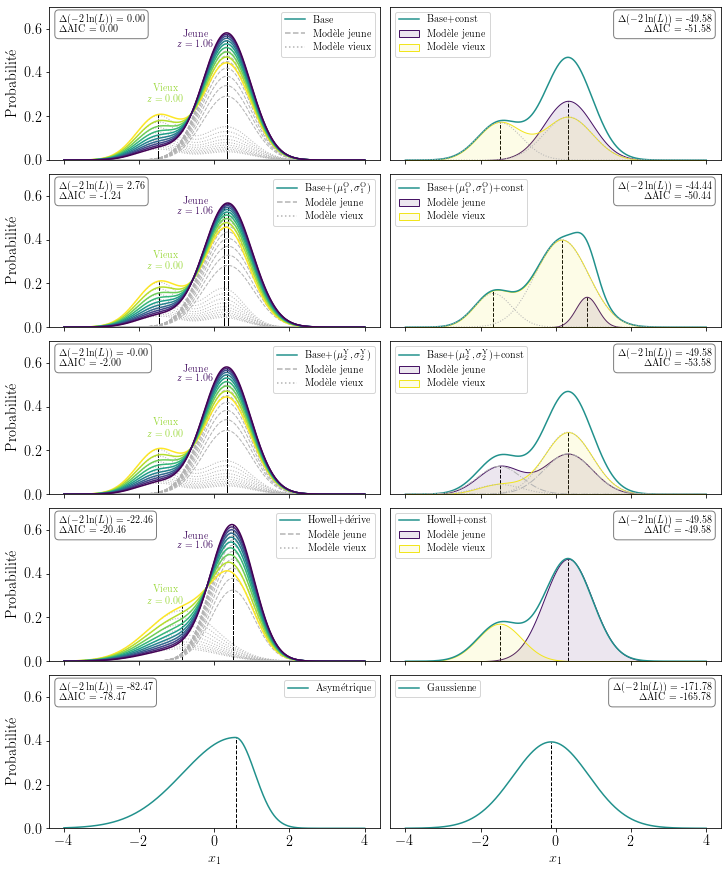

In [395]:
fig = plt.figure(figsize=[10, 12], constrained_layout=True)
gs = fig.add_gridspec(5, 2)
axd = gs.subplots(sharex='col')

mod_left = [evol3G2M2S,
            evol3G3M3S, evol4G2M2S, evol2G2M2S,
            evol1G1M2S]
z = np.mean(df_nc.redshifts)
zlin = np.linspace(df_nc.redshifts.min(),
                   np.max(df_full.loc[df_full['survey'] == 'SNLS'].redshifts), 10)
mod_prop = [{}, {},
            {}, {}, {},
            {'show_hist': True}]
mod_righ = [evol3G2M2SF,
            evol3G3M3SF, evol4G2M2SF, evol2G2M2SF,
            evol1G1M1S]
leg_r = {'loc': 'upper left', 'fontsize': 'medium'}
leg_l = {'loc': 'upper right', 'fontsize': 'medium'}
font_dict = {'fontsize': 'medium'}
box_prop = dict(facecolor='none', boxstyle='round', pad=0.4, alpha=0.5)
ymax = []

for i, mod, ax, prop in zip(range(len(mod_left)), mod_left, axd[:,0], mod_prop):
    if i == 4:
        mod.show_model_tot(ax, color=plt.cm.viridis(0.5),
                           leg_kwargs=leg_l, **prop)
    else:
        mod.show_model_evol(ax, cmap='viridis_r', zlin=zlin, **prop)
        for z in zlin:
            mod.show_model(ax,
                           y_factor=mod.delta(z), o_factor=(1-mod.delta(z)),
                           ls_o=':', ls_y='--',
                           edgecolor_o='0.7', edgecolor_y='0.7',
                           facecolor_o='none', facecolor_y='none', legend=False)
        ax.text(-1.3, 0.3, f'Vieux\n$z={zlin.min():.2f}$',
                color=plt.cm.viridis(0.85),
                ha='center', va='center',
                **font_dict)
        ax.text(-0.5, 0.55, f'Jeune\n$z={zlin.max():.2f}$',
                color=plt.cm.viridis(0.05),
                ha='center', va='center',
                **font_dict)
        handle = [Line2D([0], [0], color=plt.cm.viridis(0.5)),
                  Line2D([0], [0], color='0.7', ls='--'),
                  Line2D([0], [0], color='0.7', ls=':')]
        legend = [mod.__doc__, 'Modèle jeune', 'Modèle vieux']
        ax.legend(handle, legend, **leg_l)
    s = f'$\Delta(-2\ln(L))$ = {evol3G2M2S.get_logl()-mod.get_logl():.2f}\n' +\
                f'$\Delta$AIC = {evol3G2M2S.get_aic()-mod.get_aic():.2f}' 
    ax.text(0.03, 0.95, s,
            ha='left', va='top',
            transform=ax.transAxes,
            **font_dict,
            bbox=box_prop)
    if i < 4:
        ax.set_xlabel('')
    ymax.append(ax.get_ylim()[-1])

for i, mod, ax, prop in zip(range(len(mod_left)), mod_righ, axd[:,1], mod_prop):
    mod.show_model_tot(ax, color=plt.cm.viridis(0.5), leg_kwargs=leg_r, **prop)
    s = f'$\Delta(-2\ln(L))$ = {evol3G2M2S.get_logl()-mod.get_logl():.2f}\n' +\
                f'$\Delta$AIC = {evol3G2M2S.get_aic()-mod.get_aic():.2f}' 
    ax.text(0.97, 0.95, s,
            ha='right', va='top',
            transform=ax.transAxes,
            **font_dict,
            bbox=box_prop)
    ax.set_ylabel('')
    if i < 4:
        ax.set_xlabel('')
    ax.set_yticks([])
    ymax.append(ax.get_ylim()[-1])

for ax in axd.ravel():
    # ax.set_ylim(top=np.max(ymax))
    ax.set_ylim(top=0.7)

fig.savefig(f'../../../Images/pdf/model_all_evol-ZTF.pdf', bbox_inches='tight')
# fig.savefig(f'../../../Images/pdf/model_all_evol-cons.pdf', bbox_inches='tight')

#### In 3D

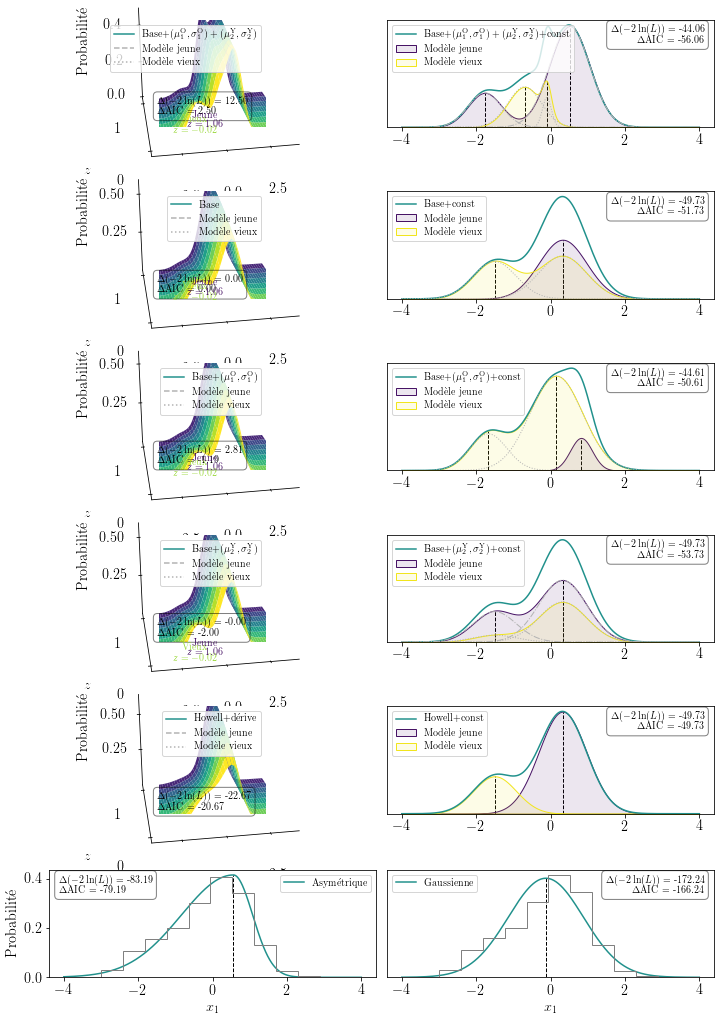

In [67]:
fig = plt.figure(figsize=[10, 14], constrained_layout=True)
spec = gridspec.GridSpec(nrows=6, ncols=2, figure=fig)

ax0 = fig.add_subplot(spec[0, 0], projection='3d')
ax1 = fig.add_subplot(spec[1, 0], projection='3d')
ax2 = fig.add_subplot(spec[2, 0], projection='3d')
ax3 = fig.add_subplot(spec[3, 0], projection='3d')
ax4 = fig.add_subplot(spec[4, 0], projection='3d')
ax5 = fig.add_subplot(spec[5, 0])
ax_left = [ax0, ax1, ax2, ax3, ax4, ax5]
ax0 = fig.add_subplot(spec[0, 1])
ax1 = fig.add_subplot(spec[1, 1])
ax2 = fig.add_subplot(spec[2, 1])
ax3 = fig.add_subplot(spec[3, 1])
ax4 = fig.add_subplot(spec[4, 1])
ax5 = fig.add_subplot(spec[5, 1])
ax_right = [ax0, ax1, ax2, ax3, ax4, ax5]

mod_left = [evol4G4M4S, evol3G2M2S,
            evol3G3M3S, evol4G2M2S, evol2G2M2S,
            evol1G1M2S]
z = np.mean(df_nc.redshifts)
zlin = np.linspace(df_nc.redshifts.min(),
                   np.max(df_full.loc[df_full['survey'] == 'SNLS'].redshifts), 10)
mod_prop = [{}, {},
            {}, {}, {},
            {'show_hist': True}]
mod_righ = [evol4G4M4SF, evol3G2M2SF,
            evol3G3M3SF, evol4G2M2SF, evol2G2M2SF,
            evol1G1M1S]
leg_r = {'loc': 'upper left', 'fontsize': 'medium'}
leg_l = {'loc': 'upper right', 'fontsize': 'medium'}
font_dict = {'fontsize': 'medium'}
box_prop = dict(facecolor='none', boxstyle='round', pad=0.4, alpha=0.5)
ymax = []

for i, mod, ax, prop in zip(range(6), mod_left, ax_left, mod_prop):
    s = f'$\Delta(-2\ln(L))$ = {evol3G2M2S.get_logl()-mod.get_logl():.2f}\n' +\
                f'$\Delta$AIC = {evol3G2M2S.get_aic()-mod.get_aic():.2f}' 
    if i == 5:
        mod.show_model_tot(ax, color=plt.cm.viridis(0.5),
                           leg_kwargs=leg_l, **prop)
        ax.text(0.03, 0.95, s,
                ha='left', va='top',
                transform=ax.transAxes,
                **font_dict,
                bbox=box_prop)
    else:
        mod.show_model_evol(ax, TD=True, cmap='viridis_r', zlin=zlin, **prop)
        # for z in zlin:
        #     mod.show_model(ax,
        #                    y_factor=mod.delta(z), o_factor=(1-mod.delta(z)),
        #                    ls_o=':', ls_y='--',
        #                    edgecolor_o='0.7', edgecolor_y='0.7',
        #                    facecolor_o='none', facecolor_y='none', legend=False)
        ax.text(-1.3, 0.3, 1, f'Vieux\n$z={zlin.min():.2f}$',
                color=plt.cm.viridis(0.85),
                ha='center', va='center',
                **font_dict)
        ax.text(-0.5, 0.55, 1, f'Jeune\n$z={zlin.max():.2f}$',
                color=plt.cm.viridis(0.05),
                ha='center', va='center',
                **font_dict)
        handle = [Line2D([0], [0], color=plt.cm.viridis(0.5)),
                  Line2D([0], [0], color='0.7', ls='--'),
                  Line2D([0], [0], color='0.7', ls=':')]
        legend = [mod.__doc__, 'Modèle jeune', 'Modèle vieux']
        ax.legend(handle, legend, **leg_l)
        ax.text(0.03, 0.95, 1, s,
                ha='left', va='top',
                transform=ax.transAxes,
                **font_dict,
                bbox=box_prop)
    if i < 5:
        ax.set_xlabel('')
    ymax.append(ax.get_ylim()[-1])

for i, mod, ax, prop in zip(range(7), mod_righ, ax_right, mod_prop):
    mod.show_model_tot(ax, color=plt.cm.viridis(0.5), leg_kwargs=leg_r, **prop)
    s = f'$\Delta(-2\ln(L))$ = {evol3G2M2S.get_logl()-mod.get_logl():.2f}\n' +\
                f'$\Delta$AIC = {evol3G2M2S.get_aic()-mod.get_aic():.2f}' 
    ax.text(0.97, 0.95, s,
            ha='right', va='top',
            transform=ax.transAxes,
            **font_dict,
            bbox=box_prop)
    ax.set_ylabel('')
    if i < 5:
        ax.set_xlabel('')
    ax.set_yticks([])
    ymax.append(ax.get_ylim()[-1])

# for ax in axd.ravel():
    # ax.set_ylim(top=np.max(ymax))
    # ax.set_ylim(top=0.85)
for ax in ax_left[:-1]:
    ax.dist = 5

fig.savefig(f'../../../Images/pdf/model_all_evol_3D-ZTF.pdf', bbox_inches='tight')
# fig.savefig(f'../../../Images/pdf/model_all_evol-cons.pdf', bbox_inches='tight')

### Minimisation des modèles *CONSERVATIFS* AVEC ZTF à mettre dans le _pandas_

In [385]:
########################################### Evol Simple

evol1G1M1S = stretchevol.Evol1G1M1S(df_nLOWZ_c)

print('1G1M1S')

evol1G1M1S.minimize()
#evol1G1M1S.show_model_tot()

########################################### Evol Kessler

evol1G1M2S = stretchevol.Evol1G1M2S(df_nLOWZ_c)

print('1G1M2S')

evol1G1M2S.minimize()
#evol1G1M2S.show_model_tot()

########################################### Evol Howell

evol2G2M2S = stretchevol.Evol2G2M2S(df_nLOWZ_c)

print('2G2M2S')

evol2G2M2S.minimize()
#evol2G2M2S.scatter()

########################################### Evol Howell Fixed

evol2G2M2SF = stretchevol.Evol2G2M2SF(df_nLOWZ_c)

print('2G2M2SF')

evol2G2M2SF.minimize()
#evol2G2M2SF.scatter()

########################################### Evol Howell Z

evol2G2M2Sz = stretchevol.Evol2G2M2S(df_nLOWZ_c, py=False)

print('2G2M2Sz')

evol2G2M2Sz.minimize()
#evol2G2M2S.scatter()

########################################### Evol Howell Fixed Z

evol2G2M2SFz = stretchevol.Evol2G2M2SF(df_nLOWZ_c, py=False)

print('2G2M2SFz')

evol2G2M2SFz.minimize()
#evol2G2M2SF.scatter()

########################################### Evol NR 1S

evol3G2M1S = stretchevol.Evol3G2M1S(df_nLOWZ_c)

print('3G2M1S')

evol3G2M1S.minimize()

########################################### Evol NR 2S z

evol3G2M1SF = stretchevol.Evol3G2M1SF(df_nLOWZ_c)

print('3G2M1SF')

evol3G2M1SF.minimize()

########################################### Evol NR 2S

evol3G2M2S = stretchevol.Evol3G2M2S(df_nLOWZ_c)

print('3G2M2S')

evol3G2M2S.minimize()
#evol3G2M2S.scatter()

########################################### Evol NR 2S z

evol3G2M2Sz = stretchevol.Evol3G2M2S(df_nLOWZ_c, py=False)

print('3G2M2Sz')

evol3G2M2Sz.minimize()
#evol3G2M2S.scatter()

########################################### Evol NR 2S Fixed

evol3G2M2SF = stretchevol.Evol3G2M2SF(df_nLOWZ_c)

print('3G2M2SF')

evol3G2M2SF.minimize(limits=[(0,1), None, None, None, None, None])
#evol3G2M2SF.scatter()

########################################### Evol NR 2S Fixed Z

evol3G2M2SFz = stretchevol.Evol3G2M2SF(df_nLOWZ_c, py=False)

print('3G2M2SFz')

evol3G2M2SFz.minimize(limits=[(0,1), None, None, None, None, None])
#evol3G2M2SF.scatter()

########################################### Evol NR 3S

evol3G3M3S = stretchevol.Evol3G3M3S(df_nLOWZ_c)

print('3G3M3S')

evol3G3M3S.minimize()

########################################### Evol NR 3S F

evol3G3M3SF = stretchevol.Evol3G3M3SF(df_nLOWZ_c)

print('3G3M3SF')

evol3G3M3SF.minimize()

########################################### Evol NR 3S Z

evol3G3M3Sz = stretchevol.Evol3G3M3S(df_nLOWZ_c, py=False)

print('3G3M3Sz')

evol3G3M3Sz.minimize()

########################################### Evol NR 4G2S

evol4G2M2S = stretchevol.Evol4G2M2S(df_nLOWZ_c)

print('4G2M2S')

evol4G2M2S.minimize()

########################################### Evol NR 4G2S F

evol4G2M2SF = stretchevol.Evol4G2M2SF(df_nLOWZ_c)

print('4G2M2SF')

GUESSVAL = {'f': 0.14268671739589583,
            'bb': -5.454890323164392,
            'aa': 0.6869059692032704,
            'mu_1': 0.551869340886351,
            'sigma_1': 0.5242352095150387,
            'mu_2': -0.6947825573353303,
            'sigma_2': 0.7580500490633603}
LIMVAL = [(0.3,1), None, None, None, None, None, None]
evol4G2M2SF.minimize(limits=LIMVAL, guess=GUESSVAL)

########################################### Evol NR 4S

evol4G4M4S = stretchevol.Evol4G4M4S(df_nLOWZ_c)

print('4G4M4S')

evol4G4M4S.minimize()

########################################### Evol NR 4S F

evol4G4M4SF = stretchevol.Evol4G4M4SF(df_nLOWZ_c)

print('4G4M4SF')

GUESSVAL = {'f': 0.629551173003198,
            'aa': 0.9720896076581093,
            'bb': 1.0577042881210368,
            'mu_1': 0.7507884223245606,
            'sigma_1': 0.4056335262642809,
            'mu_4': -1.4487107165579862,
            'sigma_4': 0.44921397062196367,
            'mu_2': -0.10179706942678185,
            'sigma_2': 0.2597995223119345,
            'mu_3': -0.7764748289670739,
            'sigma_3': 0.15335786478417332}
LIMVAL = [(0,1), None, None, None, None, None, None, None, None, None, None]
evol4G4M4SF.minimize(limits=LIMVAL, guess=GUESSVAL)

########################################### Per Sample Asym
gen = stretchevol.generic()
gen.set_model('Evol1G1M2S')

assymSNF = gen.fit(set_survey(True, 'SNF'))

assymZTF = gen.fit(set_survey(True, 'ZTF'))

assymSDSS = gen.fit(set_survey(True, 'SDSS'))

assymPS1 = gen.fit(set_survey(True, 'PS1'))

assymSNLS = gen.fit(set_survey(True, 'SNLS'))

assymHST = gen.fit(set_survey(True, 'HST'))

assymTOT = gen.fit(set_survey(True, 'All'))

assym = {'SNF': assymSNF,
         'ZTF': assymZTF,
         'SDSS': assymSDSS,
         'PS1': assymPS1,
         'SNLS': assymSNLS,
         'HST': assymHST}

print('Per Sample')

1G1M1S
1G1M2S
2G2M2S
2G2M2SF
2G2M2Sz
2G2M2SFz
3G2M1S
3G2M1SF
3G2M2S
3G2M2Sz
3G2M2SF
3G2M2SFz
3G3M3S
3G3M3SF
3G3M3Sz
4G2M2S
4G2M2SF
4G4M4S
4G4M4SF
Per Sample


## Get proba

In [386]:
def get_proba(model):
    return np.exp((evol3G2M2S.get_aic() - model.get_aic())/2)

## Comparison dataframes

In [387]:
modèles = [evol4G4M4S, evol3G2M2S,
           evol3G3M3S, evol4G2M2S, evol2G2M2S, 
           evol2G2M2SF, evol3G3M3SF,
           evol3G2M2SF, evol4G2M2SF,
           evol4G4M4SF, evol1G1M2S, evol1G1M1S]

persample = [assym[k] for k in assym.keys()]

d_mod_comp = pd.DataFrame({'Name': [k.__doc__ for k in modèles[:-4]] +
                               ['Asym par échant.'] +
                               [k.__doc__ for k in modèles[-4:]],
                           'Fixed': [k.FIXED for k in modèles[:-4]] +
                               ['True'] +
                               [k.FIXED for k in modèles[-4:]],
                           'Free param': [len(k.FREEPARAMETERS) for k in modèles[:-4]] +
                               ['3x5'] +
                               [len(k.FREEPARAMETERS) for k in modèles[-4:]],
                           '$\mathcal{L}$': [round(k.get_logl(),1) for k in modèles[:-4]] +
                               [round(np.sum([k.get_logl() for k in persample]),1)] +
                               [round(k.get_logl(),1) for k in modèles[-4:]],
                           'AIC': [round(k.get_aic(),1) for k in modèles[:-4]] +
                               [round(np.sum([k.get_aic() for k in persample]),1)] +
                               [round(k.get_aic(),1) for k in modèles[-4:]],
                           '$\Delta$ AIC': [round(evol3G2M2S.get_aic()-k.get_aic(),1)
                                                for k in modèles[:-4]] +
                               [round(evol3G2M2S.get_aic()-np.sum([k.get_aic()
                                    for k in persample]),1)] +
                               [round(evol3G2M2S.get_aic()-k.get_aic(),1)
                                    for k in modèles[-4:]],
                           'Proba': [f'{get_proba(k):.1e}' for k in modèles[:-4]] +
                               [f'{np.exp((evol3G2M2S.get_aic()-np.sum([k.get_aic() for k in persample]))/2):.1e}'] +
                               [f'{get_proba(k):.1e}' for k in modèles[-4:]]
                          })

path = '../../../Data/tables/main_comp/df_comparaison'
path += '_cons'
#if tools_sc.cons.value:
#    path += '_cons-supercut'
path += '_all-ztf.dat'
# path += '.dat'
d_mod_comp.to_csv(path)

d_mod_comp

,Name,Fixed,Free param,$\mathcal{L}$,AIC,$\Delta$ AIC,Proba
0,"Base$+(\mu_1^{\rm O},\sigma_1^{\rm O})+(\mu_2^...",False,10,2197.0,2217.0,8.6,7.3e+01
1,Base,False,5,2215.5,2225.5,0.0,1.0e+00
2,"Base$+(\mu_1^{\rm O}, \sigma_1^{\rm O})$",False,7,2211.8,2225.8,-0.3,8.6e-01
3,"Base$+(\mu_2^{\rm Y}, \sigma_2^{\rm Y})$",False,6,2215.5,2227.5,-2.0,3.7e-01
4,Howell+dérive,False,4,2240.4,2248.4,-22.9,1.1e-05
5,Howell+const,True,5,2252.8,2262.8,-37.2,8.2e-09
6,"Base$+(\mu_1^{\mathrm{O}}, \sigma_1^{\mathrm{O...",True,8,2243.8,2259.8,-34.3,3.6e-08
7,Base+const,True,6,2252.8,2264.8,-39.2,3.0e-09
8,Asym par échant.,True,3x5,2240.9,2276.9,-51.3,7.2e-12
9,"Base$+(\mu_2^{\rm Y}, \sigma_2^{\rm Y})$+const",True,7,2252.8,2266.8,-41.2,1.1e-09


In [390]:
evol3G2M2S.migrad_out

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2216                       │              Nfcn = 129              │
│ EDM = 4.57e-07 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ aa      │   -0.18   │   0.13    │            │            │         │         │       │
│ 1 │ mu_1    │   0.346   │   0.029   │            │            │         │         │       │
│ 2 │ sigma_1 │   0.606   │   0.022   │            │            │         │         │       │
│ 3 │ mu_2    │   -1.50   │   0.06    │            │            │         │         │       │
│ 4 │ sigma_2 │   0.54    │   0.04    │            │            │         │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬───────────────────────────────────────────────────┐
│         │        aa      mu_1   sigma_1      mu_2   sigma_2 │
├─────────┼───────────────────────────────────────────────────┤
│      aa │    0.0178  -0.00255   0.00178   -0.0058  -0.00334 │
│    mu_1 │  -0.00255  0.000869 -0.000382   0.00116  0.000644 │
│ sigma_1 │   0.00178 -0.000382  0.000483 -0.000779 -0.000406 │
│    mu_2 │   -0.0058   0.00116 -0.000779   0.00362   0.00169 │
│ sigma_2 │  -0.00334  0.000644 -0.000406   0.00169   0.00156 │
└─────────┴───────────────────────────────────────────────────┘

In [389]:
aa_list = scipy.stats.norm.rvs(loc=evol3G2M2S.migrad_out.values[0],
                               scale=evol3G2M2S.migrad_out.errors[0],
                               size=10000)
a_list = evol3G2M2S.get_a(aa_list)
vmin, vc, vmax = np.percentile(a_list, [16, 50, 84])

print('vmin =', round(vmin, 3))
print('vc =', round(vc, 3))
print('vmax =', round(vmax, 3))
print('a =', round(vc, 3), '^', round(vmax-vc, 2), '_', round(-(vc-vmin), 2))

vmin = 0.405
vc = 0.445
vmax = 0.486
a = 0.445 ^ 0.04 _ -0.04


## Recreate best-model and improve

### Instantiate and minimize

In [358]:
evolBASE = stretchevol.Evol3G2M2S(df_ar)
evolBASE.minimize()
evolZTF = stretchevol.Evol3G2M2S(df_nLOWZ)
evolZTF.minimize()
gen = stretchevol.generic()
gen.set_model('Evol2G2M2S')
evolHOW = gen.fit(df_ar)
evolHOWZ = gen.fit(df_nLOWZ)

### Définition de _cov_ pour sélection aléatoire des paramètres

In [4]:
cov = evolBASE.m_tot.covariance
mean = [evolBASE.m_tot.values[i] for i in range(5)]
param_hesse_mat = scipy.stats.multivariate_normal.rvs(mean=mean, cov=cov, size=500)

cov_ztf = evolZTF.m_tot.covariance
mean_ztf = [evolZTF.m_tot.values[i] for i in range(5)]
param_hesse_mat_ztf = scipy.stats.multivariate_normal.rvs(mean=mean_ztf, cov=cov_ztf, size=500)

### List of all the models

In [5]:
xlin = np.linspace(-3, 3, 1000)
z = np.mean(df.redshifts)
models_hesse_x = [evolBASE.likelihood_tot(evolBASE.delta(z),
                                           xlin,
                                           0, *param_hesse)
                for param_hesse in param_hesse_mat]
models_hesse_x = np.asarray(models_hesse_x)

models_hesse_x_ztf = [evolZTF.likelihood_tot(evolZTF.delta(z),
                                           xlin,
                                           0, *param_hesse)
                    for param_hesse in param_hesse_mat_ztf]
models_hesse_x_ztf = np.asarray(models_hesse_x_ztf)

### Take _std_

In [6]:
models_std_x = np.std(models_hesse_x, axis=0)
models_std_x_ztf = np.std(models_hesse_x_ztf, axis=0)

### Show modeling on ZTF histogram

### N21 and HD

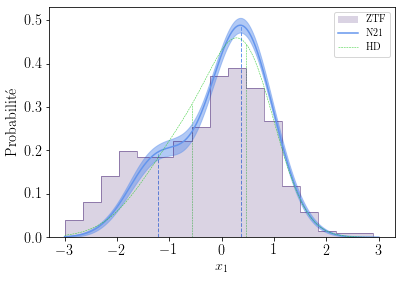

In [369]:
fig = plt.figure(figsize=[6, 4])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

histprop = {'density': True, 'bins': 17,
            'color': colors['ZTF']}

df_ztf = df_nc.loc[df_nc['survey'] == 'ZTF']
ax.hist(df_ztf.stretchs, **histprop,
        alpha=.2,
        histtype='stepfilled',
        label='ZTF')
ax.hist(df_ztf.stretchs, **histprop,
        alpha=.5,
        histtype='step')
ZTFleg = Patch(facecolor=alphacolors(.2, 'ZTF'),
               edgecolor=alphacolors(.5, 'ZTF'))
ZTFlab = 'ZTF'

z = np.mean(df_ztf.redshifts)
xlin = np.linspace(-3, 3, 1000)
zlin = np.linspace(df_ztf.redshifts.min(), df_ztf.redshifts.max(), 10)
pdfmodel = evolBASE.plot_a(xlin, z=z)
ax.plot(xlin, pdfmodel,
        color=color_ar,
        label=r'N21')
evolBASE.show_means(ax, z=z,
                      tot=True, mu_c=color_ar)
ax.fill_between(xlin,
                pdfmodel+models_std_x,
                pdfmodel-models_std_x,
                color=color_ar, alpha=.5)
BASEvoleg = Line2D([0], [0], color=color_ar, label='N21')
BASEvolab = 'N21'

pdfmodel_how = evolHOW.plot_a(xlin, z=z)
ax.plot(xlin, pdfmodel_how,
        ls='--', lw=0.5,
        color='limegreen',
        label='HD')
evolHOW.show_means(ax, z=z, mu_lw=0.5,
                   tot=True, mu_c='limegreen')
HOWevoleg = Line2D([0], [0], color=color_zt, label='HD')
HOWevolab = 'HD'

ax.set_xlabel('$x_1$')
ax.set_ylabel('Probabilité')

ax.legend()

# ax.set_title("Accord entre les modèles N21 (et son erreur) et HD\n" +
#              "avec les données d'étirement de ZTF")
fig.savefig('../../../Images/pdf/model_N21+HD_on_ZTF.pdf', bbox_inches='tight')

### N21, HD + ZTF

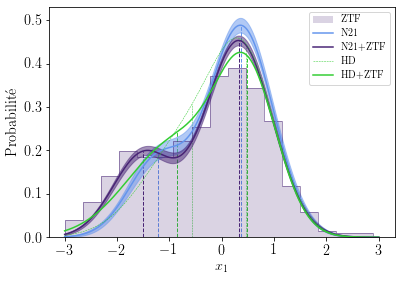

In [370]:
fig = plt.figure(figsize=[6, 4])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

histprop = {'density': True, 'bins': 17,
            'color': colors['ZTF']}

df_ztf = df_nc.loc[df_nc['survey'] == 'ZTF']
ax.hist(df_ztf.stretchs, **histprop,
        alpha=.2,
        histtype='stepfilled',
        label='ZTF')
ax.hist(df_ztf.stretchs, **histprop,
        alpha=.5,
        histtype='step')
ZTFleg = Patch(facecolor=alphacolors(.2, 'ZTF'),
               edgecolor=alphacolors(.5, 'ZTF'))
ZTFlab = 'ZTF'

z = np.mean(df_ztf.redshifts)
xlin = np.linspace(-3, 3, 1000)
zlin = np.linspace(df_ztf.redshifts.min(), df_ztf.redshifts.max(), 10)
pdfmodel = evolBASE.plot_a(xlin, z=z)
ax.plot(xlin, pdfmodel,
        color=color_ar,
        label=r'N21')
evolBASE.show_means(ax, z=z,
                      tot=True, mu_c=color_ar)
ax.fill_between(xlin,
                pdfmodel+models_std_x,
                pdfmodel-models_std_x,
                color=color_ar, alpha=.5)
BASEvoleg = Line2D([0], [0], color=color_ar, label='N21')
BASEvolab = 'N21'

pdfmodel_ztf = evolZTF.plot_a(xlin, z=z)
ax.plot(xlin, pdfmodel_ztf,
        color=color_zt,
        label='N21+ZTF')
evolZTF.show_means(ax, z=z,
                   tot=True, mu_c=color_zt)
ax.fill_between(xlin,
                pdfmodel_ztf+models_std_x_ztf,
                pdfmodel_ztf-models_std_x_ztf,
                color=color_zt, alpha=.5)
ZTFevoleg = Line2D([0], [0], color=color_zt, label='N21+ZTF')
ZTFevolab = 'N21+ZTF'

pdfmodel_how = evolHOW.plot_a(xlin, z=z)
ax.plot(xlin, pdfmodel_how,
        ls='--', lw=0.5,
        color='limegreen',
        label='HD')
evolHOW.show_means(ax, z=z, mu_lw=0.5,
                   tot=True, mu_c='limegreen')
HOWevoleg = Line2D([0], [0], color=color_zt, label='HD')
HOWevolab = 'HD'

pdfmodel_howz = evolHOWZ.plot_a(xlin, z=z)
ax.plot(xlin, pdfmodel_howz,
        color='limegreen',
        label='HD+ZTF')
evolHOWZ.show_means(ax, z=z,
                   tot=True, mu_c='limegreen')
HOWevoleg = Line2D([0], [0], color=color_zt, label='HD+ZTF')
HOWevolab = 'HD+ZTF'

ax.set_xlabel('$x_1$')
ax.set_ylabel('Probabilité')

ax.legend()

#ax.set_title("Accord entre les modèles N21, HD leurs versions ZTF\n" +
#             "avec les données d'étirement de ZTF")
fig.savefig('../../../Images/pdf/model_N21+HD+ZTF_on_ZTF.pdf', bbox_inches='tight')

In [446]:
df_ar

,survey,stretchs,stretchs_err,colors,colors_err,hostmass,hostmass_err,redshifts,infor,py,lssfr,lssfr_err_d,lssfr_err_u
0,SNF,-0.368238,0.125418,-0.011495,0.026218,9.566476,0.101505,0.075204,1.000000,1.000000,-9.743921,0.223209,0.223019
1,SNF,-1.296790,0.187199,-0.039336,0.031658,10.272276,0.101844,0.066821,0.804000,0.804000,-10.442461,0.421814,0.465882
2,SNF,-1.253416,0.114161,0.040166,0.027434,10.434992,0.098973,0.042571,0.747000,0.747000,-10.713580,0.127054,0.127858
3,SNF,0.106925,0.111141,-0.061445,0.025372,8.741923,0.106065,0.066146,0.996667,0.996667,-10.308932,0.191320,0.204861
4,SNF,0.693269,0.102088,0.040600,0.025970,7.925805,0.111967,0.023247,0.997000,0.997000,-10.489822,0.109663,0.105006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,HST,-0.387811,0.350500,0.000653,0.076959,10.0,99.0,1.305000,0.900156,0.000000,0.000000,0.000000,0.000000
1375,HST,-0.023448,0.171000,-0.035771,0.050321,10.0,99.0,0.935000,0.846712,0.000000,0.000000,0.000000,0.000000
1376,HST,-0.164953,0.534100,0.034463,0.097762,10.0,99.0,1.014000,0.860696,0.000000,0.000000,0.000000,0.000000
1377,HST,-0.455692,0.577800,-0.070254,0.064963,10.0,99.0,1.315000,0.901241,0.000000,0.000000,0.000000,0.000000


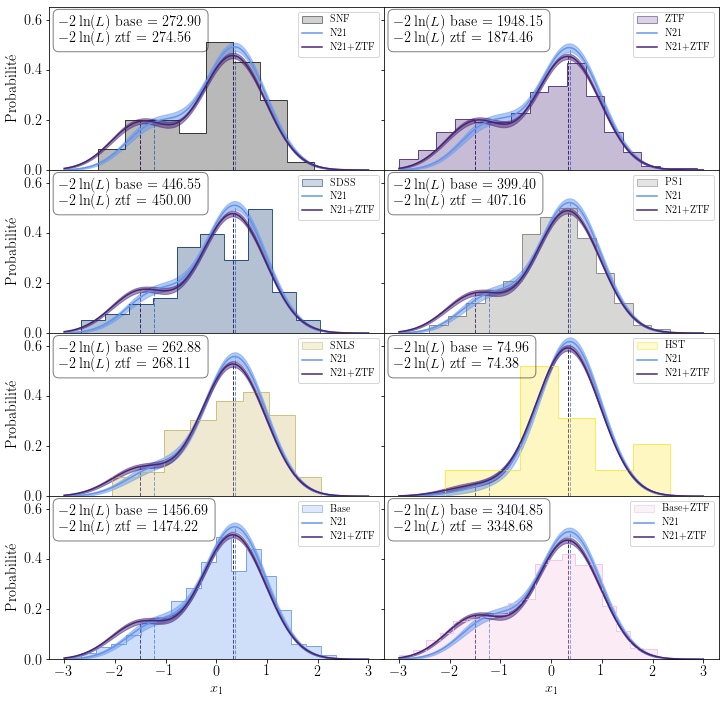

In [484]:
fig = plt.figure(figsize=[12, 12], constrained_layout=False)
gs = fig.add_gridspec(4, 2, hspace=0, wspace=0)
axd = gs.subplots(sharex=True, sharey=True)
# mod_left = []
# z = np.mean(df_nc.redshifts)
# zlin = np.linspace(df_nc.redshifts.min(),
#                    np.max(df_full.loc[df_full['survey'] == 'SNLS'].redshifts), 10)
# mod_prop = [{}, {},
#             {}, {}, {},
#             {'show_hist': True}]
# mod_righ = [evol3G2M2SF,
#             evol3G3M3SF, evol4G2M2SF, evol2G2M2SF,
#             evol1G1M1S]
# leg_r = {'loc': 'upper left', 'fontsize': 'medium'}
# leg_l = {'loc': 'upper right', 'fontsize': 'medium'}
# ymax = []

surveysnlall = surveysnl + ['Base', 'Base+ZTF']
dt_all = {'Base': df_ar, 'Base+ZTF': df_nLOWZ}
df_surv = {survey: (df_nc.loc[df_nc['survey'] == survey]
                    if 'Base' not in survey
                    else dt_all[survey])
                    #else df_nLOWZ)
           for survey in surveysnlall}

mod = {'BASE': evolBASE, 'ZTF': evolZTF}
chi2 = {modname: {survey: -2*np.sum(np.log(mod[modname].likelihood_tot(
                                    df_surv[survey].infor,
                                    df_surv[survey].stretchs,
                                    df_surv[survey].stretchs_err,
                                    **mod[modname].param)))
             for survey in surveysnlall}
       for modname in mod.keys()}

font_dict = {'fontsize': 'x-large'}
box_prop = dict(facecolor='none', boxstyle='round', pad=0.4, alpha=0.5)

for i, survey, ax in zip(range(len(surveysnlall)), surveysnlall, axd.ravel()):
    histprop = {'density': True, 'bins': 'auto',
                'color': colors[survey]}
    
    df_used = df_surv[survey]
    ax.hist(df_used.stretchs, **histprop,
            alpha=.3,
            histtype='stepfilled',
            label='PS1')
    ax.hist(df_used.stretchs, **histprop,
            alpha=.8,
            histtype='step')
    SURVleg = Patch(facecolor=alphacolors(.2, f'{survey}'),
                    edgecolor=alphacolors(.5, f'{survey}'))
    SURVlab = f'{survey}'
    
    z = np.mean(df_used.redshifts)
    xlin = np.linspace(-3, 3, 1000)
    zlin = np.linspace(df_used.redshifts.min(), df_used.redshifts.max(), 10)
    pdfmodel = evolBASE.plot_a(xlin, z=z)
    ax.plot(xlin, pdfmodel,
            color=color_ar,
            label=r'N21')
    evolBASE.show_means(ax, z=z,
                          tot=True, mu_c=color_ar)
    ax.fill_between(xlin,
                    pdfmodel+models_std_x,
                    pdfmodel-models_std_x,
                    color=color_ar, alpha=.5)
    BASEvoleg = Line2D([0], [0], color=color_ar, label='N21')
    BASEvolab = 'N21'
    
    pdfmodel_ztf = evolZTF.plot_a(xlin, z=z)
    ax.plot(xlin, pdfmodel_ztf,
            color=color_zt,
            label='N21+ZTF')
    evolZTF.show_means(ax, z=z,
                       tot=True, mu_c=color_zt)
    ax.fill_between(xlin,
                    pdfmodel_ztf+models_std_x_ztf,
                    pdfmodel_ztf-models_std_x_ztf,
                    color=color_zt, alpha=.5)
    ZTFevoleg = Line2D([0], [0], color=color_zt, label='N21+ZTF')
    ZTFevolab = 'N21+ZTF'
    
    chi2base = chi2['BASE'][survey]
    chi2ztf = chi2['ZTF'][survey]
    s = f'$-2\ln(L)$ base = {chi2base:.2f}\n' +\
        f'$-2\ln(L)$ ztf = {chi2ztf:.2f}' 
    ax.text(0.03, 0.95, s,
            ha='left', va='top',
            transform=ax.transAxes,
            **font_dict,
            bbox=box_prop)
    
    if i >= 6:
        ax.set_xlabel('$x_1$')
    if not bool(i%2):
        ax.set_ylabel('Probabilité')
    
    ax.legend([SURVleg, BASEvoleg, ZTFevoleg],
              [SURVlab, BASEvolab, ZTFevolab],
              loc='upper right', fontsize='medium')
    
    ax.set_ylim(bottom=0)
    
    #ax.set_title("Accord entre les modèles N21, HD leurs versions ZTF\n" +
    #             "avec les données d'étirement de ZTF")
for ax in axd.ravel():
    ax.set_ylim(top=0.65)
fig.savefig(f'../../../Images/pdf/model_N21+ZTF_on_allsurvs.pdf', bbox_inches='tight')

In [474]:
chi2diff = {survey: round(chi2['ZTF'][survey]-chi2['BASE'][survey], 2)
           for survey in chi2['BASE'].keys()}
chi2diff

{'SNF': 1.66,
 'ZTF': -73.69,
 'SDSS': 3.45,
 'PS1': 7.76,
 'SNLS': 5.23,
 'HST': -0.57,
 'Base': 17.53,
 'Base+ZTF': -56.16}

In [21]:
evolTEST = stretchevol.Evol3G2M2SF(df_ztf)
evolTEST.minimize()
pxrint('Fraction found =', evolTEST.param['f'])

Fraction found = 0.43413728714777944


(-3.0, 3.0)

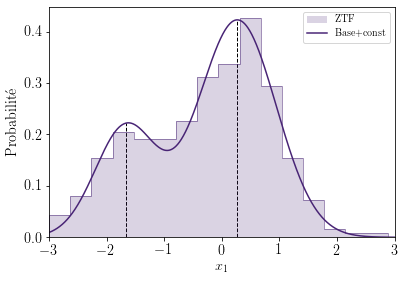

In [22]:
fig = plt.figure(figsize=[6, 4])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

histprop = {'density': True, 'bins': 16,
            'color': colors['ZTF']}

df_ztf = df_nc.loc[df_nc['survey'] == 'ZTF']
ax.hist(df_ztf.stretchs, **histprop,
        alpha=.2,
        histtype='stepfilled',
        label='ZTF')
ax.hist(df_ztf.stretchs, **histprop,
        alpha=.5,
        histtype='step')

evolTEST.show_model_tot(ax, color=color_zt, model=False)

ax.set_xlim(-3, 3)

Text(0.5, 1.0, 'Modèles N21 et N21+ZTF au redshift moyen de leurs distributions')

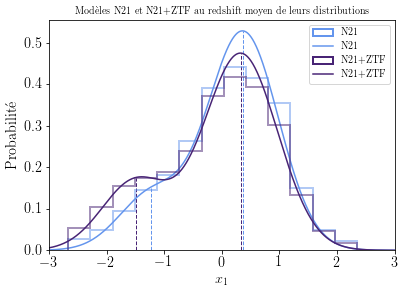

In [44]:
fig = plt.figure(figsize=[6, 4])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

nbins = 13

_, bins, _ = ax.hist(df_ar.stretchs,
                     density=True, bins=nbins,
                     alpha=.5, color=color_ar,
                     label='N21', lw=2,
                     histtype='step')
N21leg = Patch(facecolor='none', edgecolor=color_ar, lw=2,
               label='N21')
z = np.mean(df_ar.redshifts)
# zlin = np.linspace(df_ztf.redshifts.min(), df_ztf.redshifts.max(), 10)
evolBASE.show_model_tot(ax, z=z,
                        model=False, means=False,
                        color=color_ar)
evolBASE.show_means(ax, z=z, tot=True, mu_c=color_ar)
BASEvoleg = Line2D([0], [0], color=color_ar, label='N21')
BASEvolab = 'N21'

ax.hist(df_nLOWZ.stretchs,
        density=True, bins=bins,
        alpha=.5, color=color_zt,
        label='N21+ZTF', lw=2,
        histtype='step')
z = np.mean(df_nLOWZ.redshifts)
N21Zleg = Patch(facecolor='none', edgecolor=color_zt, lw=2,
                label='N21+ZTF')
evolZTF.show_model_tot(ax, z=z,
                       model=False, means=False,
                       color=color_zt)
evolZTF.show_means(ax, z=z, tot=True, mu_c=color_zt)
ZTFevoleg = Line2D([0], [0], color=color_zt, label='N21+ZTF')
ZTFevolab = 'N21+ZTF'

ax.set_xlim(-3, 3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('Probabilité')

ax.legend(handles=[N21leg, BASEvoleg, N21Zleg, ZTFevoleg])

ax.set_title('Modèles N21 et N21+ZTF au redshift moyen de leurs distributions',
             fontsize='medium')

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 0.98, 'Évolution des modèles N21 et N21+ZTF sur leurs intervalles de redshifts')

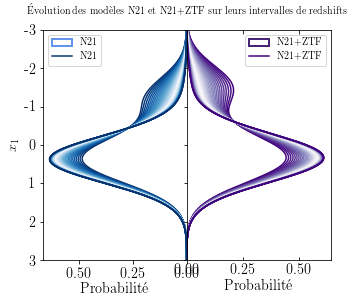

In [99]:
fig = plt.figure(figsize=[5, 4])
ax = fig.add_axes([0.1, 0.1, 0.4, 0.8])
ax2 = fig.add_axes([0.5, 0.1, 0.4, 0.8])

nbins = 13

base = ax.transData
rot = mpl.transforms.Affine2D().rotate_deg(-90)
zlin = np.linspace(df_ar.redshifts.min(), df_ar.redshifts.max(), 50)
z_m, z_p = np.percentile(zlin, [0, 100])
for z in zlin:
    evolBASE.show_model_tot(ax=ax, model=False, show_hist=False, means=False,
                            z=z, color=cmap_btb((z-z_m)/(z_p-z_m)),
                            legend=False, transform=rot+base)
BASEvoleg = Line2D([0], [0], color=plt.cm.Blues(0.99), label='N21')
BASEvolab = 'N21'
ax.invert_xaxis()
# _, bins, _ = ax.hist(df_ar.stretchs, orientation='horizontal',
#                      density=True, bins=nbins,
#                      alpha=.5, color=color_ar,
#                      label='N21', lw=2,
#                      histtype='step')
# N21leg = Patch(facecolor='none', edgecolor=color_ar, lw=2,
#                label='N21')
ax.set_xlim(right=0)
ax.set_ylim(-3, 3)
ax.set_xlabel('Probabilité')
ax.set_ylabel('$x_1$')
ax.set_yticklabels([3, 2, 1, 0, -1, -2, -3])
#ax.invert_yaxis()
ax.legend(handles=[N21leg, BASEvoleg])

base = ax2.transData
rot = mpl.transforms.Affine2D().rotate_deg(-90)
# ax2.hist(df_nLOWZ.stretchs,
#         density=True, bins=bins,
#         alpha=.5, color=color_zt,
#         label='N21+ZTF', lw=2,
#         histtype='step')
# N21Zleg = Patch(facecolor='none', edgecolor=color_zt, lw=2,
#                 label='N21+ZTF')
xlin = np.linspace(-3, 3, 1000)
zlin = np.linspace(df_nLOWZ.redshifts.min(), df_nLOWZ.redshifts.max(), 50)
z_m, z_p = np.percentile(zlin, [0, 100])
for z in zlin:
    evolZTF.show_model_tot(ax=ax2, model=False, show_hist=False, means=False,
                            z=z, color=cmap_ptp((z-z_m)/(z_p-z_m)),
                            legend=False, transform=rot+base)
ZTFevoleg = Line2D([0], [0], color=plt.cm.Purples(0.99), label='N21+ZTF')
ZTFevolab = 'N21+ZTF'

ax2.set_ylim(-3, 3)
ax2.set_xlim(left=0)
ax2.set_xlabel('Probabilité')
#ax2.set_xticks([])
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels([])
ax2.tick_params(axis='x', top=True, direction='in')
ax2.set_ylabel('')

ax2.legend(handles=[N21Zleg, ZTFevoleg])

fig.suptitle('Évolution des modèles N21 et N21+ZTF sur leurs intervalles de redshifts',
             fontsize='medium')

Text(0.5, 1.0, "Évolution des modèles N21 et N21+ZTF sur l'intervalle de redshift de ZTF")

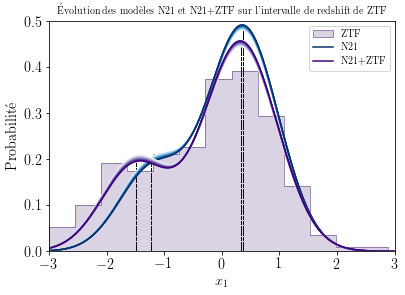

In [33]:
fig = plt.figure(figsize=[6, 4])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

histprop = {'density': True, 'bins': 13,
            'color': colors['ZTF']}

df_ztf = df_nc.loc[df_nc['survey'] == 'ZTF']
ax.hist(df_ztf.stretchs, **histprop,
        alpha=.2,
        histtype='stepfilled',
        label='ZTF')
ax.hist(df_ztf.stretchs, **histprop,
        alpha=.5,
        histtype='step')
ZTFleg = Patch(facecolor=alphacolors(.2, 'ZTF'),
               edgecolor=alphacolors(.5, 'ZTF'))
ZTFlab = 'ZTF'

z = np.mean(df.redshifts)
xlin = np.linspace(-3, 3, 1000)
zlin = np.linspace(df_ztf.redshifts.min(), df_ztf.redshifts.max(), 10)

evolBASE.show_model_evol(ax, zlin,
                         cmap='Blues',
                         legend=False)

evolZTF.show_model_evol(ax, zlin,
                        cmap='Purples',
                        legend=False)
BASEvoleg = Line2D([0], [0], color=plt.cm.Blues(0.99))
BASEvolab = 'N21'
ZTFevoleg = Line2D([0], [0], color=plt.cm.Purples(0.99))
ZTFevolab = 'N21+ZTF'
ax.legend([ZTFleg, BASEvoleg, ZTFevoleg],
          [ZTFlab, BASEvolab, ZTFevolab])

ax.set_xlabel('$x_1$')
ax.set_ylabel('Probabilité')

ax.set_xlim(-3, 3)
ax.set_ylim(top=0.5)

ax.set_title("Évolution des modèles N21 et N21+ZTF sur l'intervalle de redshift de ZTF",
             fontsize='medium')

# Plot in $z$ not $x_1$

## Définition age-law

In [485]:
def delta(z):
    return evolBASE.delta(z)

def age_law_gen(z, param_hesse):
    """Function to get laws with parameters taken wrt there hesse error"""
    return (delta(z)*param_hesse[1]
      + (1-delta(z))*(evolBASE.get_a(param_hesse[0])*param_hesse[1]
                      + (1 - evolBASE.get_a(param_hesse[0]))*param_hesse[2]))

### Only take _a_, _µ1_ and _µ2_

In [486]:
param_hesse_cut = param_hesse_mat[:,[0,1,3]]

param_hesse_cut_ztf = param_hesse_mat_ztf[:,[0,1,3]]

### List of all the models

In [487]:
zlin = np.linspace(0, 2.65, 3000)
models_hesse = [[age_law_gen(zi, param_hesse)
                 for zi in zlin]
                for param_hesse in param_hesse_cut]
models_hesse = np.asarray(models_hesse)

models_hesse_ztf = [[age_law_gen(zi, param_hesse_ztf)
                      for zi in zlin]
                     for param_hesse_ztf in param_hesse_cut_ztf]
models_hesse_ztf = np.asarray(models_hesse_ztf)

### Take _std_

In [488]:
models_std = np.std(models_hesse, axis=0)
models_std_ztf = np.std(models_hesse_ztf, axis=0)

## Moyennage sur toutes les données pour plus de points

### Définition des bins sur lesquels faire les moyennes

In [516]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

# _, bins = np.histogram(df_nc.redshifts, histedges_equalN(df_nc.redshifts, 6))
_, bins = np.histogram(df_nLOWZ.redshifts, histedges_equalN(df_nLOWZ.redshifts, 6))
_, bins_ar = np.histogram(df_ar.redshifts, histedges_equalN(df_ar.redshifts, 6))
_, bins_cons = np.histogram(df_c.redshifts, histedges_equalN(df_c.redshifts, 6))

bins_text = bins.copy()
bins_text[-1] = 1.4
bins_text[0] = .001
bins_text_ar = bins_ar.copy()
bins_text_ar[-1] = 1.4

### Définition des slices

In [517]:
slices = []
for i in range(len(bins)-1):
    if i < len(bins)-2:
        slices.append(np.where((df_nLOWZ.redshifts >= bins[i])
                             & (df_nLOWZ.redshifts < bins[i+1]))[0])
    else:
        slices.append(np.where((df_nLOWZ.redshifts > bins[i])
                             & (df_nLOWZ.redshifts <= bins[i+1]))[0])
slices_ar = []
for i in range(len(bins_ar)-1):
    if i < len(bins_ar)-2:
        slices_ar.append(np.where((df_ar.redshifts >= bins_ar[i])
                                & (df_ar.redshifts < bins_ar[i+1]))[0])
    else:
        slices_ar.append(np.where((df_ar.redshifts > bins_ar[i])
                                & (df_ar.redshifts <= bins_ar[i+1]))[0])

slices_cons = []
for i in range(len(bins)-1):
    slices_cons.append(np.where((df_nLOWZ_c.redshifts > bins[i])
                              & (df_nLOWZ_c.redshifts <= bins[i+1]))[0])
    
slices_cons_ar = []
for i in range(len(bins_ar)-1):
    slices_cons_ar.append(np.where((df_ar_c.redshifts > bins_ar[i])
                                 & (df_ar_c.redshifts <= bins_ar[i+1]))[0])

## Fit Gaussian stretch to each bin

In [496]:
def gauss(x, dx, mu, sigma, normed=True):
    '''Le modèle de distribution'''
    sigma_eff = np.sqrt(dx**2+sigma**2)
    norm = 1 if normed else np.sqrt(2*np.pi)*sigma_eff
    return norm*scipy.stats.norm.pdf(x, mu, scale=sigma_eff)

def minimize(xc, cons, nslice):
    '''Meilleure valeur des paramètres'''
    if cons == 'nl':
        df_used = df_nLOWZ
        slices_used = slices
    elif cons == 'nlc':
        df_used = df_nLOWZ_c
        slices_used = slices_cons
    elif cons == 'ar':
        df_used = df_ar
        slices_used = slices_ar
    elif cons == 'arc':
        df_used = df_ar_c
        slices_used = slices_cons_ar
    else:
        raise ValueError(f"'cons' must be either 'nc' or 'c', {cons} given")
    
    if nslice == 'all':
        def loglikelihood(mu, sigma):
            '''La fonction à minimiser'''
            return -2*np.sum(np.log(gauss(df_used[xc].values,
                                          df_used[xc+'_err'].values,
                                          mu, sigma))) 
    # elif 0 <= nslice <= 5:
    else:
        def loglikelihood(mu, sigma):
            '''La fonction à minimiser'''
            return -2*np.sum(np.log(gauss(df_used[xc].values[slices_used[nslice]],
                                          df_used[xc+'_err'].values[slices_used[nslice]],
                                          mu, sigma)))
    # else:
    #     raise ValueError("'nslice' must be either 'all' or between 0 and 5 (included), "
    #                      +f'{nslice} given')
    
    m_tot = im.Minuit(loglikelihood, 0, 1)
    m_tot.errordef = im.Minuit.LIKELIHOOD
    # m_tot.errordef = im.Minuit.LEAST_SQUARES
    migrad_out = m_tot.migrad()
    return migrad_out

## Computation of means and averages

### For all+ZTF

In [518]:
z_comp_mean = np.zeros(len(bins)-1)
z_comp_std = np.zeros(len(bins)-1)
x1_comp_mean = np.zeros(len(bins)-1)
x1_comp_average = np.zeros(len(bins)-1)
x1_comp_std = np.zeros(len(bins)-1)
c_comp_mean = np.zeros(len(bins)-1)
c_comp_average = np.zeros(len(bins)-1)
c_comp_std = np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    z_comp_mean[i] = np.mean(df_nLOWZ.redshifts.values[slices[i]])
    z_comp_std[i] = np.std(df_nLOWZ.redshifts.values[slices[i]])
    x1_comp_mean[i] = np.mean(df_nLOWZ.stretchs.values[slices[i]])
    x1_comp_average[i] = np.average(df_nLOWZ.stretchs.values[slices[i]],
                                    weights=1/(df_nLOWZ.stretchs_err.values[slices[i]]**2 +
                                               minimize('stretchs', 'nl', i).errors[-1]**2))
    x1_comp_std[i] = np.std(df_nLOWZ.stretchs.values[slices[i]])
    c_comp_mean[i] = np.mean(df_nLOWZ.colors.values[slices[i]])
    c_comp_average[i] = np.average(df_nLOWZ.colors.values[slices[i]],
                                   weights=1/(df_nLOWZ.colors_err.values[slices[i]]**2 +
                                              minimize('colors', 'nl', i).errors[-1]**2))
    c_comp_std[i] = np.std(df_nLOWZ.colors.values[slices[i]])

z_comp_mean_cons = np.zeros(len(bins)-1)
z_comp_std_cons = np.zeros(len(bins)-1)
x1_comp_mean_cons = np.zeros(len(bins)-1)
x1_comp_average_cons = np.zeros(len(bins)-1)
x1_comp_std_cons = np.zeros(len(bins)-1)
c_comp_mean_cons = np.zeros(len(bins)-1)
c_comp_average_cons = np.zeros(len(bins)-1)
c_comp_std_cons = np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    z_comp_mean_cons[i] = np.mean(df_nLOWZ_c.redshifts.values[slices_cons[i]])
    z_comp_std_cons[i] = np.std(df_nLOWZ_c.redshifts.values[slices_cons[i]])
    x1_comp_mean_cons[i] = np.mean(df_nLOWZ_c.stretchs.values[slices_cons[i]])
    x1_comp_average_cons[i] = np.average(df_nLOWZ_c.stretchs.values[slices_cons[i]],
                                         weights=1/(df_nLOWZ_c.stretchs_err.values[slices_cons[i]]**2 +
                                                    minimize('stretchs', 'nlc', i).errors[-1]**2))
    x1_comp_std_cons[i] = np.std(df_nLOWZ_c.stretchs.values[slices_cons[i]])
    c_comp_mean_cons[i] = np.mean(df_nLOWZ_c.colors.values[slices_cons[i]])
    c_comp_average_cons[i] = np.average(df_nLOWZ_c.colors.values[slices_cons[i]],
                                        weights=1/(df_nLOWZ_c.colors.values[slices_cons[i]]**2 +
                                                   minimize('colors', 'nlc', i).errors[-1]**2))
    c_comp_std_cons[i] = np.std(df_nLOWZ_c.colors.values[slices_cons[i]])

### For fiduciel only

In [498]:
z_comp_mean_ar = np.zeros(6)
z_comp_std_ar = np.zeros(6)
x1_comp_mean_ar = np.zeros(6)
x1_comp_average_ar = np.zeros(6)
x1_comp_std_ar = np.zeros(6)
c_comp_mean_ar = np.zeros(6)
c_comp_average_ar = np.zeros(6)
c_comp_std_ar = np.zeros(6)

for i in range(6):
    z_comp_mean_ar[i] = np.mean(df_ar.redshifts.values[slices_ar[i]])
    z_comp_std_ar[i] = np.std(df_ar.redshifts.values[slices_ar[i]])
    x1_comp_mean_ar[i] = np.mean(df_ar.stretchs.values[slices_ar[i]])
    x1_comp_average_ar[i] = np.average(df_ar.stretchs.values[slices_ar[i]],
                                    weights=1/(df_ar.stretchs_err.values[slices_ar[i]]**2 +
                                               minimize('stretchs', 'ar', i).errors[-1]**2))
    x1_comp_std_ar[i] = np.std(df_ar.stretchs.values[slices_ar[i]])
    c_comp_mean_ar[i] = np.mean(df_ar.colors.values[slices_ar[i]])
    c_comp_average_ar[i] = np.average(df_ar.colors.values[slices_ar[i]],
                                   weights=1/(df_ar.colors_err.values[slices_ar[i]]**2 +
                                              minimize('colors', 'ar', i).errors[-1]**2))
    c_comp_std_ar[i] = np.std(df_ar.colors.values[slices_ar[i]])

z_comp_mean_cons_ar = np.zeros(6)
z_comp_std_cons_ar = np.zeros(6)
x1_comp_mean_cons_ar = np.zeros(6)
x1_comp_average_cons_ar = np.zeros(6)
x1_comp_std_cons_ar = np.zeros(6)
c_comp_mean_cons_ar = np.zeros(6)
c_comp_average_cons_ar = np.zeros(6)
c_comp_std_cons_ar = np.zeros(6)

for i in range(6):
    z_comp_mean_cons_ar[i] = np.mean(df_ar_c.redshifts.values[slices_cons_ar[i]])
    z_comp_std_cons_ar[i] = np.std(df_ar_c.redshifts.values[slices_cons_ar[i]])
    x1_comp_mean_cons_ar[i] = np.mean(df_ar_c.stretchs.values[slices_cons_ar[i]])
    x1_comp_average_cons_ar[i] = np.average(df_ar_c.stretchs.values[slices_cons_ar[i]],
                                         weights=1/(df_ar_c.stretchs_err.values[slices_cons_ar[i]]**2 +
                                                    minimize('stretchs', 'arc', i).errors[-1]**2))
    x1_comp_std_cons_ar[i] = np.std(df_ar_c.stretchs.values[slices_cons_ar[i]])
    c_comp_mean_cons_ar[i] = np.mean(df_ar_c.colors.values[slices_cons_ar[i]])
    c_comp_average_cons_ar[i] = np.average(df_ar_c.colors.values[slices_cons_ar[i]],
                                        weights=1/(df_ar_c.colors.values[slices_cons_ar[i]]**2 +
                                                   minimize('colors', 'arc', i).errors[-1]**2))
    c_comp_std_cons_ar[i] = np.std(df_ar_c.colors.values[slices_cons_ar[i]])

In [112]:
print(f'redshift_mean = {z_comp_mean[0]:.2}')
print(f'stretch_mean = {x1_comp_mean[0]:.2} ± ' +
      f'{x1_comp_std[0]/np.sqrt(len(df_nc.stretchs.values[slices[0]])):.2}')
print(f'stretch_average = {x1_comp_average[0]:.2} ± ' +
      f'{x1_comp_std[0]/np.sqrt(len(df_nc.stretchs.values[slices[0]])):.2}')
print(f'redshift_mean = {z_comp_mean[-1]:.2}')
print(f'stretch_mean = {x1_comp_mean[-1]:.2} ± ' +
      f'{x1_comp_std[-1]/np.sqrt(len(df_nc.stretchs.values[slices[-1]])):.2}')
print(f'stretch_average = {x1_comp_average[-1]:.2} ± ' +
      f'{x1_comp_std[-1]/np.sqrt(len(df_nc.stretchs.values[slices[-1]])):.2}')

redshift_mean = 0.021
stretch_mean = -0.41 ± 0.071
stretch_average = -0.35 ± 0.071
redshift_mean = 0.45
stretch_mean = 0.19 ± 0.058
stretch_average = 0.086 ± 0.058


In [113]:
for i in range(6):
    print(f'redshift_mean[{i}] = {z_comp_mean[i]:.2}')
    print(f'stretch_mean[{i}] = {x1_comp_mean[i]:.2} ± ' +
          f'{x1_comp_std[i]/np.sqrt(len(df_nc.stretchs.values[slices[i]])):.2}')
    print(f'stretch_average[{i}] = {x1_comp_average[i]:.2} ± ' +
          f'{x1_comp_std[i]/np.sqrt(len(df_nc.stretchs.values[slices[i]])):.2}')
    
tot_x1_ave = np.average(df_nc.stretchs,
                        weights=1/(df_nc.stretchs**2 +
                                   minimize('stretchs', 'nc', 'all').errors[-1]**2))
print(f'Global stretch mean = {np.mean(df_nc.stretchs):.2}')
print(f'Global stretch average = {tot_x1_ave:.2}')

redshift_mean[0] = 0.021
stretch_mean[0] = -0.41 ± 0.071
stretch_average[0] = -0.35 ± 0.071
redshift_mean[1] = 0.034
stretch_mean[1] = -0.36 ± 0.076
stretch_average[1] = -0.34 ± 0.076
redshift_mean[2] = 0.044
stretch_mean[2] = -0.25 ± 0.075
stretch_average[2] = -0.14 ± 0.075
redshift_mean[3] = 0.055
stretch_mean[3] = -0.25 ± 0.071
stretch_average[3] = -0.27 ± 0.071
redshift_mean[4] = 0.14
stretch_mean[4] = 0.037 ± 0.062
stretch_average[4] = 0.081 ± 0.062
redshift_mean[5] = 0.45
stretch_mean[5] = 0.19 ± 0.058
stretch_average[5] = 0.086 ± 0.058
Global stretch mean = -0.17
Global stretch average = 0.0027


## Stretch evol

In [499]:
mean_c = ipw.Dropdown(options=['mean', 'weighted'],
                      value='mean',
                      description='Type of mean:')

display(mean_c)

Dropdown(description='Type of mean:', options=('mean', 'weighted'), value='mean')

In [500]:
meanmod = stretchevol.Evol1G1M1S(df_nLOWZ)
meanmod.minimize()
meanmod_ar = stretchevol.Evol1G1M1S(df_ar)
meanmod_ar.minimize()

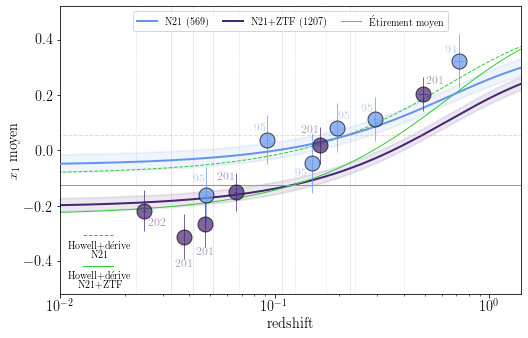

In [520]:
fig = plt.figure(figsize=[8, 5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

prop = dict(marker='o', ms=15,
            mfc=color_ar, ecolor=color_ar,
            mew=1, mec='k', alpha=.7)
prop2 = dict(marker='o', ms=15,
             mfc=color_zt, ecolor=color_zt,
             mew=1, mec='k', alpha=.7)

cmap = 'inferno'

#vmap_v = plt.cm.get_cmap(cmap)(np.linspace(0, 1, len(bins)))
vprop = dict(lw=0.5, ls='--', alpha=.3)
for i in range(len(bins)):
    ax.vline(bins[i], color=color_zt, **vprop)
for i in range(len(bins_ar)):
    ax.vline(bins_ar[i], color=color_ar, **vprop)

#############################################################################################

if mean_c.value == 'mean':
    shift_slices = [[0.001, -0.05],
                    [-0.0035, -0.11],
                    [-0.00425, -0.11],
                    [-0.012, 0.04],
                    [-0.030, 0.045],
                    [0.015, 0.035]]
    shift_slices_ar = [[-0.006, 0.050],
                       [-0.012, 0.035],
                       [-0.025, -0.045],
                       [+0.002, 0.035],
                       [-0.040, 0.030],
                       [-0.100, 0.030]]
    for i in range(len(bins_ar)-1):
        ax.errorbar(z_comp_mean_ar[i], x1_comp_mean_ar[i],
                    xerr=z_comp_std_ar[i]/np.sqrt(len(df_ar.redshifts.values[slices_ar[i]])),
                    yerr=x1_comp_std_ar[i]/np.sqrt(len(df_ar.stretchs.values[slices_ar[i]])),
                    **prop, zorder=10, lw=1)
        ax.text(z_comp_mean_ar[i]+shift_slices_ar[i][0],
                x1_comp_mean_ar[i]+shift_slices_ar[i][1],
                str(len(df_ar.redshifts.values[slices_ar[i]])),
                color=color_ar, alpha=.5, fontsize='large')
    for i in range(len(bins)-1):
        ax.errorbar(z_comp_mean[i], x1_comp_mean[i],
                    xerr=z_comp_std[i]/np.sqrt(len(df_nLOWZ.redshifts.values[slices[i]])),
                    yerr=x1_comp_std[i]/np.sqrt(len(df_nLOWZ.stretchs.values[slices[i]])),
                    **prop2, zorder=10, lw=1)
        ax.text(z_comp_mean[i]+shift_slices[i][0],
                x1_comp_mean[i]+shift_slices[i][1],
                str(len(df_nLOWZ.redshifts.values[slices[i]])),
                color=color_zt, alpha=.5, fontsize='large')
else:
    shift_slices = [[0.001, -0.05],
                    [-0.0035, -0.11],
                    [-0.00425, -0.11],
                    [0.003, -0.06],
                    [-0.015, 0.070],
                    [-0.085, 0.055]]
    shift_slices_ar = [[-0.006, 0.050],
                       [-0.012, 0.035],
                       [-0.025, 0.025],
                       [+0.002, 0.035],
                       [-0.040, 0.040],
                       [-0.100, 0.040]]
    for i in range(len(bins_ar)-1):
        ax.errorbar(z_comp_mean_ar[i], x1_comp_average_ar[i],
                    xerr=z_comp_std_ar[i]/np.sqrt(len(df_ar.redshifts.values[slices_ar[i]])),
                    yerr=x1_comp_std_ar[i]/np.sqrt(len(df_ar.stretchs.values[slices_ar[i]])),
                    **prop, zorder=10, lw=1)
        ax.text(z_comp_mean_ar[i]+shift_slices_ar[i][0],
                x1_comp_average_ar[i]+shift_slices_ar[i][1],
                str(len(df_ar.redshifts.values[slices_ar[i]])),
                color=color_ar, alpha=.5, fontsize='large')
    for i in range(len(bins)-1):
        ax.errorbar(z_comp_mean[i], x1_comp_average[i],
                    xerr=z_comp_std[i]/np.sqrt(len(df_nLOWZ.redshifts.values[slices[i]])),
                    yerr=x1_comp_std[i]/np.sqrt(len(df_nLOWZ.stretchs.values[slices[i]])),
                    **prop2, zorder=10, lw=1)
        ax.text(z_comp_mean[i]+shift_slices[i][0],
                x1_comp_average[i]+shift_slices[i][1],
                str(len(df_nLOWZ.redshifts.values[slices[i]])),
                color=color_zt, alpha=.5, fontsize='large')

allleg, = ax.plot(zlin, evolBASE.plot_evol(zlin),
                  color=color_ar, lw=2,
                  zorder=8)
alllab = f'N21 ({len(df_ar)})'
ax.fill_between(zlin, evolBASE.plot_evol(zlin) + models_std,
                evolBASE.plot_evol(zlin) - models_std,
                color=color_ar, alpha=.1, lw=2)

ztf, = ax.plot(zlin, evolZTF.plot_evol(zlin),
               color=color_zt, lw=2)
ztflab = f'N21+ZTF ({len(df_nLOWZ)})'
ax.fill_between(zlin, evolZTF.plot_evol(zlin) + models_std_ztf,
                evolZTF.plot_evol(zlin) - models_std_ztf,
                color=color_zt, alpha=.1, lw=2)

how, = ax.plot(zlin, evolHOW.plot_evol(zlin),
               color='limegreen', lw=1, ls='--')
howlab = r'Howell+dérive\smallbreak\vspace{-6pt}~~~~~~~N21'
howz, = ax.plot(zlin, evolHOWZ.plot_evol(zlin),
                color='limegreen', lw=1)
howzlab = r'Howell+dérive\smallbreak\vspace{-6pt}~~~N21+ZTF'

ax.set_xlabel(r'redshift', fontsize='x-large')
ax.set_ylabel(r'$x_1$ moyen', fontsize='x-large')

ax.tick_params(labelsize='x-large')

#############################################################################################

# if mean_c.value == 'mean':
#     for i, c in zip(range(6), vmap_s):
#         ax.errorbar(z_comp_mean_cons[i], x1_comp_mean_cons[i],
#                      xerr=z_comp_std_cons[i]/np.sqrt(len(df_c.redshifts.values[slices_cons[i]])),
#                      yerr=x1_comp_std_cons[i]/np.sqrt(len(df_c.stretchs.values[slices_cons[i]])),
#                      color=vmap_s[i], **prop, alpha=.3, zorder=9, lw=1)
# 
# else:
#     for i, c in zip(range(6), vmap_s):
#         ax.errorbar(z_comp_mean_cons[i], x1_comp_average_cons[i],
#                      xerr = z_comp_std_cons[i]/np.sqrt(len(df_c.redshifts.values[slices_cons[i]])),
#                      yerr = x1_comp_std_cons[i]/np.sqrt(len(df_c.stretchs.values[slices_cons[i]])),
#                      color=vmap_s[i], **prop, alpha=.3, zorder=9, lw=1)
# 
# cons, = ax.plot(zlin, age_law_all_cons(zlin),
#                 color='C0', lw=1.5, ls='--', alpha=.5,
#                 label='Conservatif (422)', zorder=7)
# conslab = 'Conservatif (422)'

#############################################################################################
hprop = dict(color='C1', lw=1, ls='-')
hprop_ar = dict(color='C1', lw=1, ls='--', alpha=.3)
if mean_c.value == 'mean':
    ax.hline(meanmod.param['mu'], **hprop)
    hlab = 'Étirement moyen' 
    ax.hline(meanmod_ar.param['mu'], **hprop_ar)
    #ax.hline(np.mean(df_nLOWZ.stretchs), color='C1', lw=1, ls='-', label='Mean stretch')

else:
    ax.hline(np.average(df_nLOWZ.stretchs,
                        weights=1/(df_nLOWZ.stretchs**2 +
                                   minimize('stretchs', 'nl', 'all').values[1]**2)),
             **hprop)
    ax.hline(np.average(df_ar.stretchs,
                        weights=1/(df_ar.stretchs**2 +
                                   minimize('stretchs', 'ar', 'all').values[1]**2)),
             **hprop_ar)
    hlab = 'Étirement pondéré'

hline = Line2D([0], [0], **hprop)
hline_ar = Line2D([0], [0], **hprop_ar)

#############################################################################################

shift_slices = [[0.001,   0.007],
                [-0.0032, 0.008],
                [-0.004,  0.011],
                [-0.0065, 0.014],
                [-0.025,  0.027],
                [-0.300,  0.178]]

#for i in range(6):
#     if len(df_nLOWZ.redshifts.values[slices[i]]) == len(df_c.redshifts.values[slices_cons[i]]):
    # print((bins_text[i+1]+bins_text[i])/2-shift_slices[i][0])
    # print(-0.465)
    # print(str(len(df_nLOWZ.redshifts.values[slices[i]])))
    #ax.text((bins_text[i+1]+bins_text[i])/2-shift_slices[i][0], -0.465,
    #ax.text((bins_text[i+1]+bins_text[i])/2+shift_slices[i][0], -0.52,
    #        str(len(df_nLOWZ.redshifts.values[slices[i]])), va='bottom',
    #        color=color_zt, alpha=.5, fontsize='large')
    #ax.text((bins_text_ar[i+1]+bins_text_ar[i])/2+shift_slices[i][1], -0.48,
    #        str(len(df_ar.redshifts.values[slices_ar[i]])),
    #        color=color_ar, alpha=.5, fontsize='large')
#    else:
#        ax.text((bins_text[i+1]+bins_text[i])/2-shift_slices[i][0], -0.445,
#                str(len(df_nLOWZ.redshifts.values[slices[i]])), alpha=.2,
#                fontsize='large')
#        ax.text((bins_text[i+1]+bins_text[i])/2-shift_slices[i][1], -0.48,
#                '(' + str(len(df_c.redshifts.values[slices_cons[i]])) + ')', alpha=.2,
#                fontsize='large')

#############################################################################################

ax.set_ylim(-0.52, 0.52)
ax.set_xlim(0.01, 1.4)
ax.set_xscale('log')

leg_base = ax.legend([allleg, ztf, hline],
                     [alllab, ztflab, hlab],
                     ncol=3, loc='upper center', columnspacing=1.4, fontsize=10)
leg_oth = ax.legend([how, howz],
                    [howlab, howzlab],
                    loc='lower left', fontsize=10,
                    bbox_to_anchor = (0.030, 0.02, 0.3, 0.3),
                    labelspacing=1.5,
                    handletextpad=-4, handlelength=3,
                    frameon=False)
for txt in leg_oth.get_texts():
    #txt.set_ha("center") # horizontal alignment of text item
    txt.set_x(-5) # x-position
    txt.set_y(-10) # y-position

ax.add_artist(leg_base)

fig.savefig(f'../../../Images/pdf/stretchevol_all-oth_vs_ztf-{mean_c.value}.pdf', bbox_inches='tight')
fig.savefig(f'../../../Images/png/stretchevol_all-oth_vs_ztf-{mean_c.value}.png', bbox_inches='tight', dpi=600)

In [128]:
bins_text

array([-0.015099  ,  0.02876333,  0.03878833,  0.049013  ,  0.07235301,
        0.19527333,  1.4       ])